<a href="https://colab.research.google.com/github/AjaharDaroga/BOOK_RECOMMENDATION_SYSTEM/blob/main/BOOK_RECOMMENDATION_SYSTEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The main objective is to create a book recommendation system for users.**

In [1]:
# importing Basic libraries
import pandas as pd               #DataFrame
import numpy as np                #arrays & matrices
import seaborn as sns             #visualization library
import matplotlib.pyplot as plt   #visualization library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [2]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Books = pd.read_csv("/content/drive/MyDrive/CAPSTONE_PROJECTS/UNSUPERVISED_ML_PROJECT/DATA/Books.csv")
Users = pd.read_csv("/content/drive/MyDrive/CAPSTONE_PROJECTS/UNSUPERVISED_ML_PROJECT/DATA/Users.csv")
Ratings = pd.read_csv("/content/drive/MyDrive/CAPSTONE_PROJECTS/UNSUPERVISED_ML_PROJECT/DATA/Ratings.csv")

# DATASETS

In [4]:
# view the data
Books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
Users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
Ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


# DATA PREPARATION FOR BOOKS DATASET

In [7]:
# shape of dataset (i.e row & col)
Books.shape,Users.shape,Ratings.shape

((271360, 8), (278858, 3), (1149780, 3))

Understand the Books dataset

In [8]:
# info of dataset
Books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [9]:
# missing data
Books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [10]:
# Rename the feature name for performing operation
Books.columns = ['ISBN', 'Book_Title', 'Book_Author', 'Year_Of_Publication', 'Publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
Books.head()

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [11]:
# Feaching the missing values
Books.loc[Books.Book_Author.isnull(),:]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,imageUrlS,imageUrlM,imageUrlL
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [12]:
Books.loc[Books.Publisher.isnull(),:]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,imageUrlS,imageUrlM,imageUrlL
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [13]:
# imputing the missing values
Books.loc[(Books.ISBN == '9627982032'), 'Book_Author'] = 'No_Author'
Books.loc[(Books.ISBN == '193169656X'), 'Publisher'] = 'No_Publisher'
Books.loc[(Books.ISBN == '1931696993'), 'Publisher'] = 'No_Publisher'

In [14]:
# checking missing data after 
Books.isnull().sum()

ISBN                   0
Book_Title             0
Book_Author            0
Year_Of_Publication    0
Publisher              0
imageUrlS              0
imageUrlM              0
imageUrlL              3
dtype: int64

In [15]:
# Removing the images from dataset beacuse its not required for model.
Books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'], axis=1, inplace=True)

In [16]:
# unique 
Books.nunique(axis=0)

ISBN                   271360
Book_Title             242135
Book_Author            102024
Year_Of_Publication       202
Publisher               16808
dtype: int64

In [17]:
# Checking for unique values because data type is object
Books.Year_Of_Publication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

"0" , 'DK Publishing Inc','Gallimard' & year greater than 2022 is the wrong data entry in year of publication feature.

In [18]:
Books.loc[Books.Year_Of_Publication == 'DK Publishing Inc', :]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [19]:
Books.loc[Books.Year_Of_Publication == 'Gallimard', :]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


After seen above recoreds we understand the mispalce the info in columns

In [20]:
Books.at[209538 ,'Book_Title'] = 'DK Readers: Creating the X-Men, How It All Begen (Level 4: Proficient Readers)'
Books.at[209538 ,'Book_Author'] = 'Michael Teitelbaum'
Books.at[209538 ,'Year_Of_Publication'] = 2000
Books.at[209538 ,'Publisher'] = 'DK Publishing Inc'

Books.at[221678 ,'Book_Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
Books.at[221678 ,'Book_Author'] = 'James Buckley'
Books.at[221678 ,'Year_Of_Publication'] = 2000
Books.at[221678 ,'Publisher'] = 'DK Publishing Inc'

Books.at[220731 ,'Book_Title'] = 'Peuple du ciel, suivi de Les Bergers'
Books.at[220731 ,'Book_Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'
Books.at[220731 ,'Year_Of_Publication'] = 2003
Books.at[220731 ,'Publisher'] = 'Gallimard'

In [21]:
Books.Year_Of_Publication = pd.to_numeric(Books.Year_Of_Publication, errors = 'coerce')

In [22]:
# imputing the wrong entry with mean()
Books.loc[(Books.Year_Of_Publication > 2022) | (Books.Year_Of_Publication == 0), 'Year_Of_Publication'] = np.NAN
Books.Year_Of_Publication.fillna(round(Books.Year_Of_Publication.mean()), inplace = True)

In [23]:
# Converting year of publication in Numbers
Books.Year_Of_Publication = Books.Year_Of_Publication.astype(np.int32)

In [24]:
# Uppercasing all alphabets in ISBN
Books['ISBN'] = Books['ISBN'].str.upper()
# Drop duplicate rows
Books.drop_duplicates(keep='last', inplace=True) 
Books.reset_index(drop = True, inplace = True)

In [25]:
# Final Dataset for Books
df_book=Books.copy()
df_book.head()

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


# DATA PREPRATION FOR USERS DATASET

In [26]:
# # view the data
Users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


Location Feature contains CITY, STATE, COUNTRY & Age feature has missing values

In [27]:
# shape of dataset (i.e row & col)
Users.shape

(278858, 3)

In [28]:
# info of dataset
Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [29]:
# missing data
Users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [30]:
# Rename the feature name for performing operation
Users.columns = ['User_ID','Location','Age']
Users.head()

,User_ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [31]:
# checking for unique value so that identify wrong entry
print(sorted(list(Users['Age'].unique())))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [32]:
# Imputing outlier with mean values
Users.loc[(Users.Age > 90) | (Users.Age < 10), 'Age'] = np.nan
Users.Age = Users.Age.fillna(Users.Age.mean())
Users.Age = Users.Age.astype(np.int32) #changing Datatype to int
# for checking
print(sorted(Users.Age.unique()))

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


In [33]:
sep_list = Users.Location.str.split(', ')

city = []
state = []
country = []
count_no_state = 0    
count_no_country = 0

for i in range(0,len(sep_list)):
    if sep_list[i][0] == ' ' or sep_list[i][0] == '' or sep_list[i][0]=='n/a' or sep_list[i][0] == ',':  #removing invalid entries too
        city.append('other')
    else:
        city.append(sep_list[i][0].lower())

    if(len(sep_list[i])<2):
        state.append('other')
        country.append('other')
        count_no_state += 1
        count_no_country += 1
    else:
        if sep_list[i][1] == ' ' or sep_list[i][1] == '' or sep_list[i][1]=='n/a' or sep_list[i][1] == ',':   #removing invalid entries 
            state.append('other')
            count_no_state += 1            
        else:
            state.append(sep_list[i][1].lower())
        
        if(len(sep_list[i])<3):
            country.append('other')
            count_no_country += 1
        else:
            if sep_list[i][2] == ''or sep_list[i][1] == ',' or sep_list[i][2] == ' ' or sep_list[i][2] == 'n/a':
                country.append('other')
                count_no_country += 1
            else:
                country.append(sep_list[i][2].lower())
        
Users = Users.drop('Location',axis=1)
temp = []
for ent in city:
    c = ent.split('/')            #handling cases where city/state entries from city list as state is already given 
    temp.append(c[0])

df_city = pd.DataFrame(temp,columns=['City'])
df_state = pd.DataFrame(state,columns=['State'])
df_country = pd.DataFrame(country,columns=['Country'])

Users = pd.concat([Users, df_city], axis=1)
Users = pd.concat([Users, df_state], axis=1)
Users = pd.concat([Users, df_country], axis=1)

print(count_no_country)   #printing the number of countries didnt have any values 
print(count_no_state)     #printing the states which didnt have any values

4659
16044


In [34]:
#Drop duplicate rows
Users.drop_duplicates(keep='last', inplace=True)
Users.reset_index(drop=True, inplace=True)

In [35]:
#Final Dataset for Users
df_users=Users.copy()
df_users.head()

,User_ID,Age,City,State,Country
0,1,34,nyc,new york,usa
1,2,18,stockton,california,usa
2,3,34,moscow,yukon territory,russia
3,4,17,porto,v.n.gaia,portugal
4,5,34,farnborough,hants,united kingdom


In [36]:
df_users.isnull().sum()

User_ID    0
Age        0
City       0
State      0
Country    0
dtype: int64

# DATA PREPARATION FOR RATINGS DATASET

In [37]:
#  view the data
Ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [38]:
# shape of dataset (i.e row & col)
Ratings.shape

(1149780, 3)

In [39]:
# missing data
Ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [40]:
# Rename the feature name for performing operation
Ratings.columns = ['User_ID','ISBN','Book_Rating']
Ratings.head()

,User_ID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [41]:
# checking all ratings number or not
from pandas.api.types import is_numeric_dtype
print(is_numeric_dtype(Ratings['Book_Rating']))
# checking User-ID contains only number or not
print(is_numeric_dtype(Ratings['User_ID']))

True
True


In [42]:
"""for i in (Ratings.ISBN):
  len("ISBN")!=10
  print("No proper format ")
else:
  print(False)"""


'for i in (Ratings.ISBN):\n  len("ISBN")!=10\n  print("No proper format ")\nelse:\n  print(False)'

In [43]:
## removing extra characters from ISBN (from ratings dataset) existing in books dataset
import re
bookISBN = Books['ISBN'].tolist() 
reg = "[^A-Za-z0-9]" 
for index, row_Value in Ratings.iterrows():
    z = re.search(reg, row_Value['ISBN'])    
    if z:
        f = re.sub(reg,"",row_Value['ISBN'])
        if f in bookISBN:
            Ratings.at[index , 'ISBN'] = f

In [44]:
# Uppercasing all alphabets in ISBN
Ratings['ISBN'] = Ratings['ISBN'].str.upper()
# Drop duplicate rows
Ratings.drop_duplicates(keep='last', inplace=True)
Ratings.reset_index(drop=True, inplace=True)

In [45]:
#Final Dataset for Ratings
df_ratings=Ratings.copy()
df_ratings.head()

,User_ID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


# Final Dataset (Books,Users,Ratings) Merging

In [98]:
final_dataset = pd.merge(df_book, df_ratings, on='ISBN', how='inner')
final_dataset = pd.merge(final_dataset, df_users, on='User_ID', how='inner')
final_dataset.head()

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,User_ID,Book_Rating,Age,City,State,Country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,18,stockton,california,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,34,timmins,ontario,canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,34,timmins,ontario,canada
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,34,timmins,ontario,canada
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0,34,timmins,ontario,canada


In [99]:
# missing data
final_dataset.isnull().sum()

ISBN                   0
Book_Title             0
Book_Author            0
Year_Of_Publication    0
Publisher              0
User_ID                0
Book_Rating            0
Age                    0
City                   0
State                  0
Country                0
dtype: int64

In [100]:
# shape of dataset (i.e row & col)
final_dataset.shape

(1031609, 11)

In [101]:
print(list(final_dataset['Book_Rating'].unique()))

[0, 5, 6, 7, 9, 10, 8, 3, 1, 4, 2]


In [102]:
# Basis of rating we recoomend the so rating is imporatant feature
df = final_dataset[final_dataset['Book_Rating'] != 0]
df = df.reset_index(drop = True)

In [103]:
# shape of dataset (i.e row & col)
df.shape

(384074, 11)

In [104]:
# Clean Dataset for EDA
df.head()


,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,User_ID,Book_Rating,Age,City,State,Country
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,34,timmins,ontario,canada
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,8,5,34,timmins,ontario,canada
2,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,8,5,34,timmins,ontario,canada
3,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,8,5,34,timmins,ontario,canada
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,8,6,34,timmins,ontario,canada


# EDA

In [53]:
# average count across 
'''plt.figure(figsize=(14,6))
top_book = pd.DataFrame(df.groupby(['Book_Title', 'Book_Rating'])['Book_Author'].value_counts().index[0:15])
sns.barplot(data=top_book, x='Book_Title', y='Book_Rating', hue='Book_Title',legend=True)'''

"plt.figure(figsize=(14,6))\ntop_book = pd.DataFrame(df.groupby(['Book_Title', 'Book_Rating'])['Book_Author'].value_counts().index[0:15])\nsns.barplot(data=top_book, x='Book_Title', y='Book_Rating', hue='Book_Title',legend=True)"

In [54]:
avg_count = df.groupby('Book_Rating')['Book_Rating'].agg(['count'])
avg_count

,count
Book_Rating,
1,1481
2,2375
3,5121
4,7621
5,45376
6,31709
7,66433
8,91865
9,60813


Text(0.5, 1.0, 'Top 10 Book_Rating')

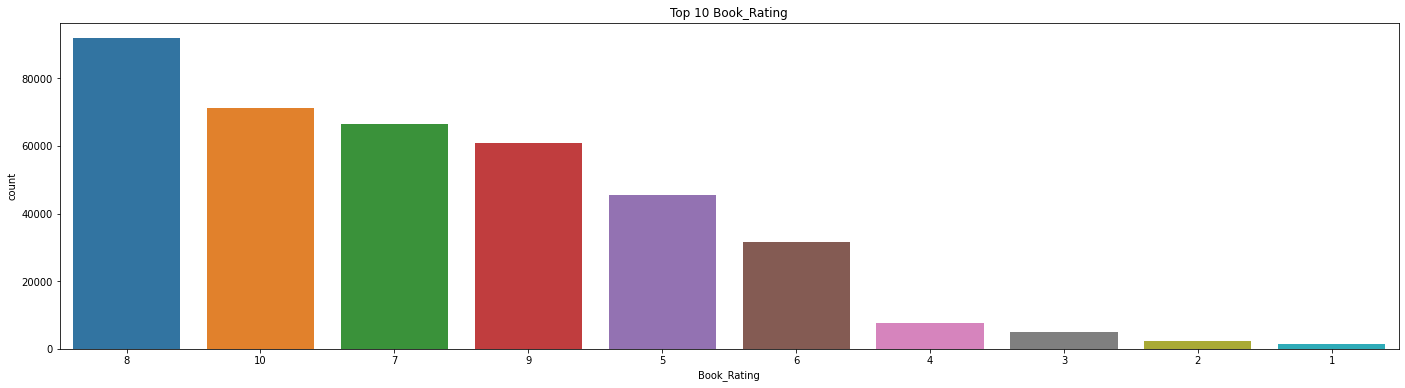

In [55]:
# top 10 book by count
plt.figure(figsize=(24,6))
sns.countplot(x="Book_Rating",order=df['Book_Rating'].value_counts().index[0:10], data=df)
plt.title("Top 10 Book_Rating")

Text(0.5, 1.0, 'Top 10 Books Name')

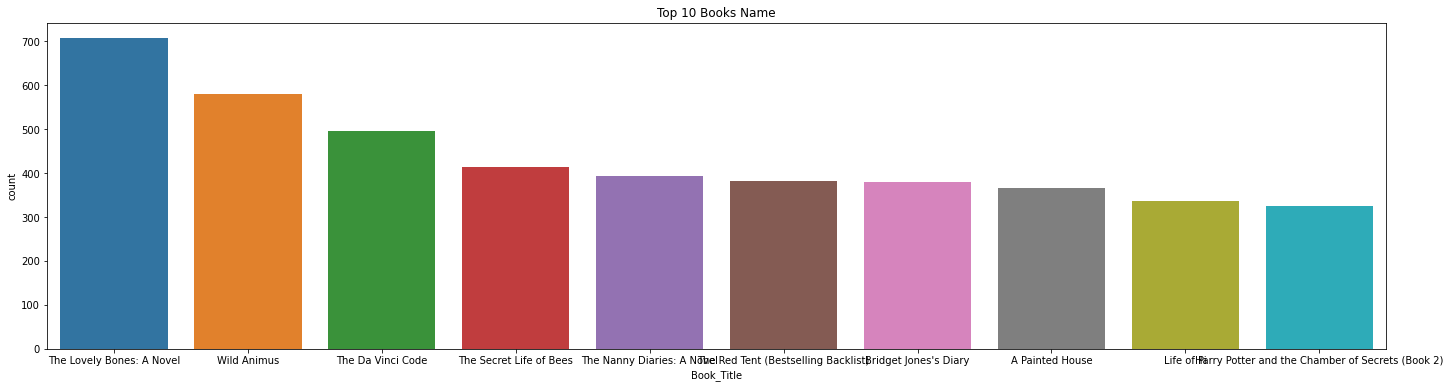

In [56]:
# top 10 book by count
plt.figure(figsize=(24,6))
sns.countplot(x="Book_Title",order=df['Book_Title'].value_counts().index[0:10], data=df)
plt.title("Top 10 Books Name")

Text(0.5, 1.0, ' Top 15 Book author')

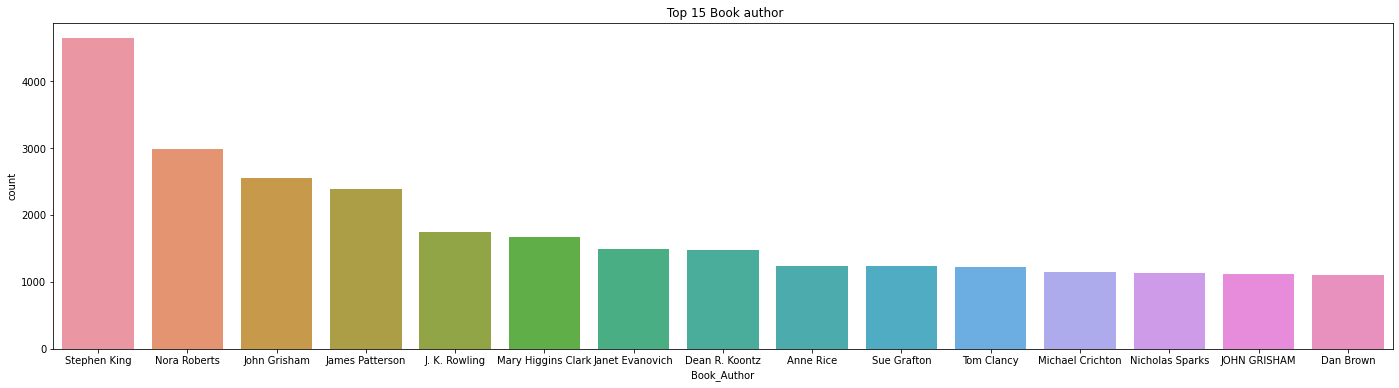

In [57]:
# Top 10 book author by no of count
plt.figure(figsize=(24,6))
sns.countplot(x="Book_Author",order=df['Book_Author'].value_counts().index[0:15],data=df)
plt.title(" Top 15 Book author")

Text(0.5, 1.0, ' Top 10 Book Publisher')

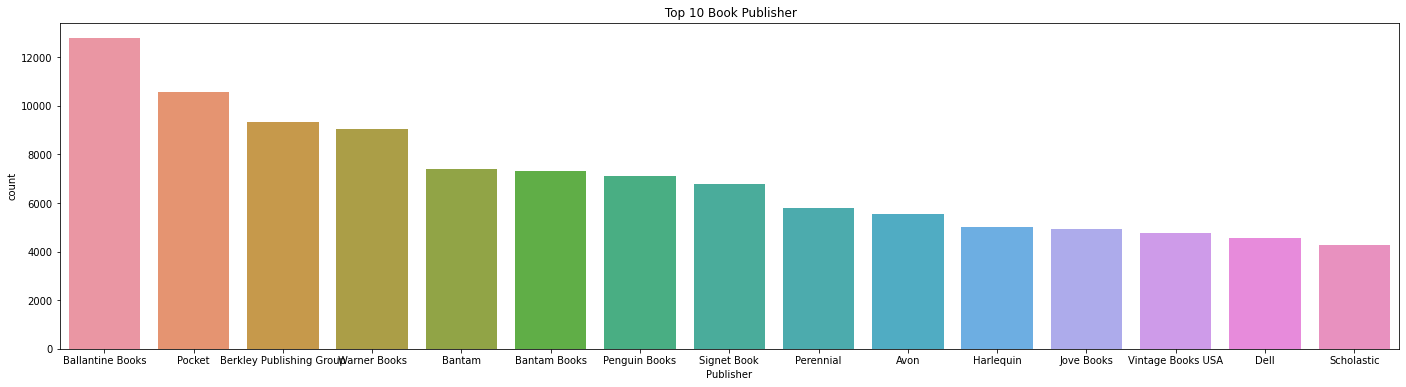

In [58]:
plt.figure(figsize=(24,6))
sns.countplot(x="Publisher",order=df['Publisher'].value_counts().index[0:15],data=df)
plt.title(" Top 10 Book Publisher")

Text(0.5, 1.0, 'No of readers from each city (Top 10)')

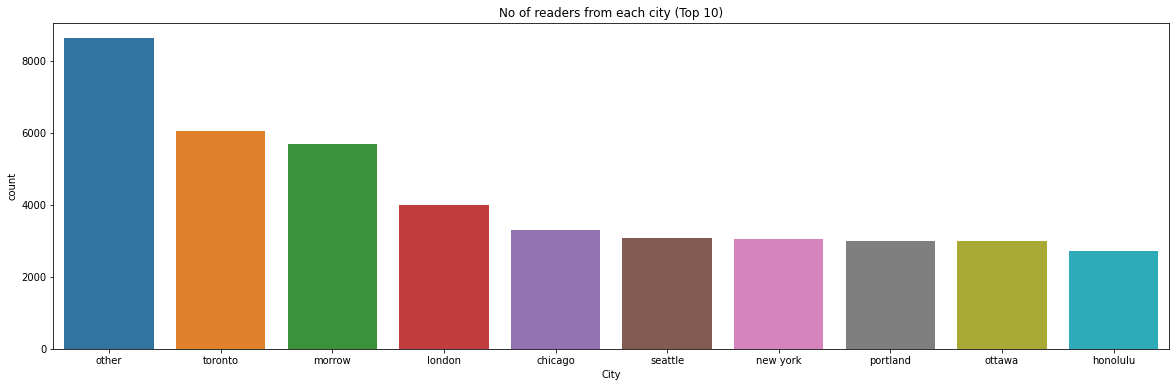

In [59]:
plt.figure(figsize=(20,6))
sns.countplot(x="City",order=df['City'].value_counts().index[0:10],data=df)
plt.title("No of readers from each city (Top 10)")

Text(0.5, 1.0, 'No of readers from each State (Top 10)')

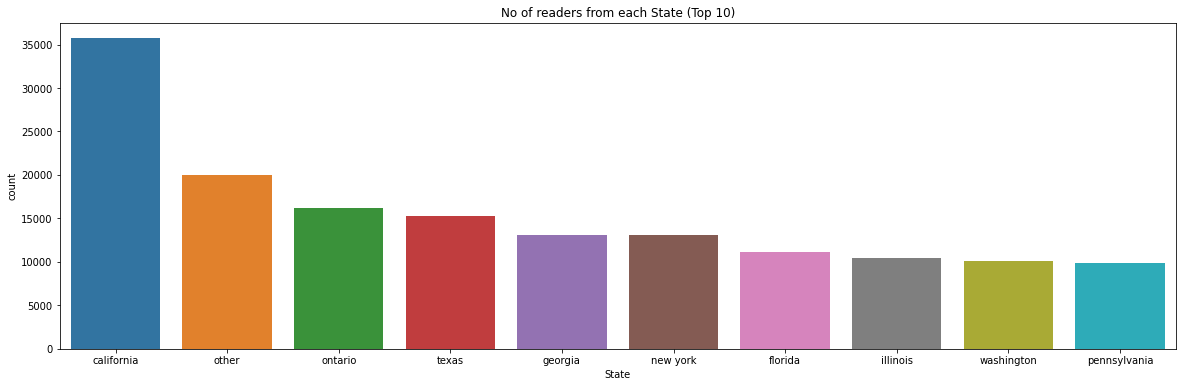

In [60]:
plt.figure(figsize=(20,6))
sns.countplot(x="State",order=df['State'].value_counts().index[0:10],data=df)
plt.title("No of readers from each State (Top 10)")

Text(0.5, 1.0, 'No of readers from each Country (Top 10)')

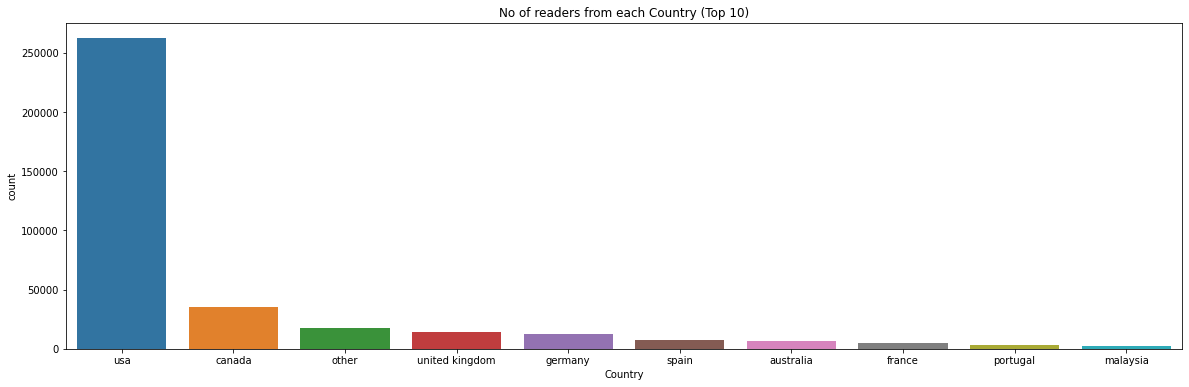

In [61]:
plt.figure(figsize=(20,6))
sns.countplot(x="Country",order=df['Country'].value_counts().index[0:10],data=df)
plt.title("No of readers from each Country (Top 10)")

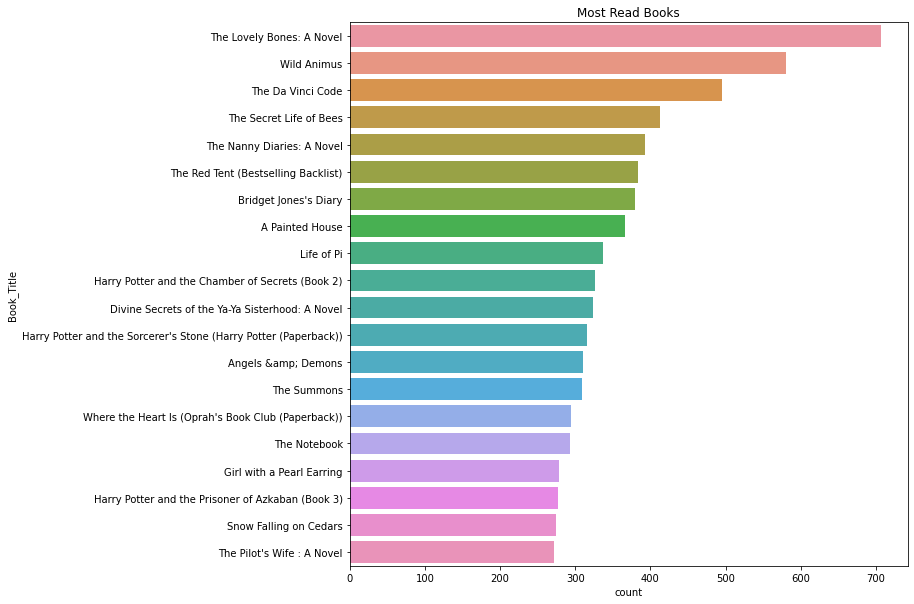

In [63]:
# Most Read Books
most_read = df.Book_Title.value_counts().reset_index()
most_read.columns = ['Book_Title','count']

plt.figure(figsize = (10,10))
plt.title("Most Read Books")
sns.barplot(x = 'count', y = 'Book_Title', data = most_read.head(20));

([<matplotlib.patches.Wedge at 0x7fe85289cc50>,
 [Text(0.7194293052201984, 0.8321186662912825, 'The Lovely Bones: A Novel'),
  Text(-0.8264184498452213, 0.7259700722174582, 'Wild Animus'),
  Text(-0.9171577510701642, -0.6073068908319079, 'The Da Vinci Code'),
  Text(0.1271865585647779, -1.0926223406650848, 'The Secret Life of Bees'),
  Text(0.9772737456232646, -0.5049118993601506, 'The Nanny Diaries: A Novel')])

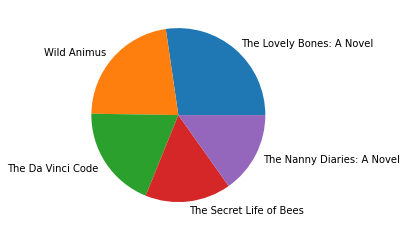

In [111]:
Title= df.Book_Title.value_counts().index
values = df.Book_Title.value_counts().values
# Pie Chart Top 5
plt.pie(values[:5], labels=Title[:5])

([<matplotlib.patches.Wedge at 0x7fe852963c10>,
 [Text(0.5771602642364915, 0.9364219291465057, 'Stephen King'),
  Text(-0.9910358039211146, 0.47733430145593997, 'Nora Roberts'),
  Text(-0.792234790853586, -0.7631277980529704, 'John Grisham'),
  Text(0.3039513663541095, -1.057172439525109, 'James Patterson'),
  Text(1.0202064388287466, -0.411313532688103, 'J. K. Rowling')])

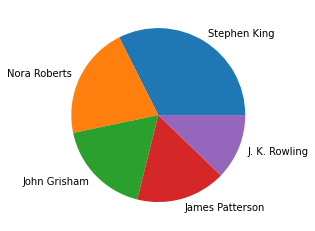

In [109]:
Auther= df.Book_Author.value_counts().index
values = df.Book_Author.value_counts().values
# Pie Chart Top 5
plt.pie(values[:5], labels=Auther[:5])

([<matplotlib.patches.Wedge at 0x7fe85287b990>,
 [Text(-0.8186963496573909, 0.7346674669928316, 'usa'),
  Text(0.46341038413374636, -0.9976225818800484, 'canada'),
  Text(0.8765888920689506, -0.664523825232271, 'other'),
  Text(1.031137762144371, -0.3830860418755806, 'united kingdom'),
  Text(1.093151690322549, -0.12255358805418139, 'germany')],
 [Text(-0.44656164526766773, 0.40072770926881723, '76.72%'),
  Text(0.2527693004365889, -0.5441577719345718, '10.40%'),
  Text(0.478139395673973, -0.3624675410357842, '5.11%'),
  Text(0.5624387793514749, -0.20895602284122575, '4.22%'),
  Text(0.5962645583577539, -0.06684741166591711, '3.55%')])

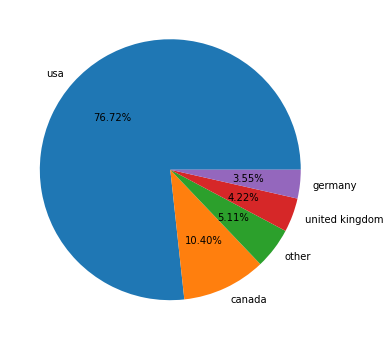

In [112]:
# Top Country 
Auther= df.Country.value_counts().index
values = df.Country.value_counts().values
# Pie Chart Top 5
plt.figure(figsize = (10,6))
plt.pie(values[:5], labels=Auther[:5],autopct="%1.2f%%")

# Popularity Based Reccomedation
BASED ON RATING

In [64]:
# Top book based on rating
Top_Books= pd.DataFrame(df.groupby('Book_Title')['Book_Rating'].count()
                         .sort_values(ascending=False).head(10))

print('The Top 10 Books Recommendation : ')
Top_Books

The Top 10 Books Recommendation : 


,Book_Rating
Book_Title,
The Lovely Bones: A Novel,707
Wild Animus,581
The Da Vinci Code,495
The Secret Life of Bees,413
The Nanny Diaries: A Novel,393
The Red Tent (Bestselling Backlist),383
Bridget Jones's Diary,380
A Painted House,366
Life of Pi,337


# Filtering Feature for Model
Rating Criteria =200

User Criteria = 50


In [65]:
final_dataset.head()

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,User_ID,Book_Rating,Age,City,State,Country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,18,stockton,california,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,34,timmins,ontario,canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,34,timmins,ontario,canada
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,34,timmins,ontario,canada
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0,34,timmins,ontario,canada


In [66]:
# Applying Criteria on user
criteria=final_dataset['User_ID'].value_counts()>200
criteria=criteria[criteria].index

In [67]:
final_dataset=final_dataset[final_dataset['User_ID'].isin(criteria)]
final_dataset.shape

(474115, 11)

In [68]:
number_rating=final_dataset.groupby('Book_Title')['Book_Rating'].count().reset_index()

In [69]:
final_rating = final_dataset.merge(number_rating, on="Book_Title")
final_rating.shape

(474115, 12)

In [70]:
final_rating=final_rating[final_rating['Book_Rating_y']>=50]
final_rating.shape

(58658, 12)

In [71]:
Book_pivot = final_rating.pivot_table(columns='User_ID',index='Book_Title',values='Book_Rating_y')
Book_pivot.fillna(0, inplace= True)
Book_pivot

User_ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,6563,6575,7158,7286,7346,7915,8067,8245,8681,8936,10447,10819,11601,11676,11993,12538,12824,12982,13082,13273,13552,13850,14422,14521,15408,15418,16106,16634,16795,16916,...,263163,263460,263877,264031,264082,264317,264321,264637,265115,265313,265595,265889,266056,266226,266753,266865,267635,268030,268032,268110,268330,268932,269566,269719,269890,270713,270820,271195,271284,271448,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book_Title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1984,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,70.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,0.0,0.0,160.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,0.0,0.0,0.0,160.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,0.0,0.0,0.0,0.0,160.0,0.0,...,0.0,160.0,160.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,160.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,122.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.0,122.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.0,122.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.0,0.0,0.0,122.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,70.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,114.0,0.0,114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0,0.0,114.0,114.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0,114.0,114.0,114.0,0.0,0.0,0.0,0.0,114.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0,0.0,0.0,0.0,0.0,114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0,0.0,0.0,0.0,0.0,114.0,0.0,0.0,0.0,114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,57.0,0.0,0.0,0.0,0.0,0.0,57.0,0.0,57.0,0.0,0.0,0.0,0.0,0.0,57.0,0.0,0.0,0.0,0.0,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,57.0,0.0,0.0,0.0,0.0,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,0.0,0.0,0.0,0.0,57.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,62.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,0.0,0.0,0.0


In [72]:
# Converting to sparse matrix
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(Book_pivot)
type(book_sparse)

scipy.sparse.csr.csr_matrix

# Model

In [73]:
# Importing the model library
from sklearn.neighbors import NearestNeighbors
KNN_model = NearestNeighbors(algorithm='brute')
KNN_model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [76]:
# For disct=distances & sugg=
distances, suggestions = KNN_model.kneighbors(Book_pivot.iloc[273, :].values.reshape(1,-1),n_neighbors=6)

In [77]:
suggestions

array([[273, 316, 456, 315,  93, 171]])

In [79]:
for i in range(len(suggestions)):
  print(Book_pivot.index[suggestions[i]])

Index(['Irish Hearts', 'Macgregor Grooms (Macgregors)',
       'Stanislaski Brothers (Silhouette Promo)',
       'Macgregor Brides (Macgregors)', 'Carnal Innocence',
       'Engaging The Enemy'],
      dtype='object', name='Book_Title')


In [92]:
# define fuction for for output
def recommend_book (Book_name):
  ''' Take input as book name & Returns 5 book suggestion based on distance'''
  book_id= np.where(Book_pivot.index==Book_name)[0][0]
  distances, suggestions=KNN_model.kneighbors(Book_pivot.iloc[book_id, :].values.reshape(1,-1),n_neighbors=6)

  for i in range(len(suggestions)):
    if i==0:
      print('The suggestions fro', Book_name, "are :")
    if not i:
      print(Book_pivot.index[suggestions[i]])


In [95]:
# Lets try our model
recommend_book('Harry Potter and the Chamber of Secrets (Book 2)')

The suggestions fro Harry Potter and the Chamber of Secrets (Book 2) are :
Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Order of the Phoenix (Book 5)',
       'Harry Potter and the Sorcerer's Stone (Book 1)',
       'Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))'],
      dtype='object', name='Book_Title')
